In [ ]:
#Proiect Probabilitate & Statistica : Fotbal

#Am creat un tabel cu datele fiecarei echipe din cele 10 : numele, nr de meciuri la care a participat, nr de meciuri pe care le-a castigat, nr de jucatori de top pe
#care ii are inainte de inceperea campionatului (vom presupune ca acesta nu se poate schimba pe parcurs, nu sunt permise "transferurile" si jucatorii
#nu se ranesc), totaluri de goluri marcate pana la inceperea campionatului (acesta nu se va actualiza pe parcurs) 

#Outputul acestui simulator va fi un fisier in care se vor scrie pe fiecare
# linie descrierea fiecarui meci (echipe, joaca acasa sau nu, parametrii simularii,
# etc.), iar la final se va printa tabela de scor.

#Ulterior, pe baza acestor meciuri, pentru fiecare echipa se va aplica teorema lui Bayes pentru a studia probabilitatea fiecarei echipe de a castiga daca meciul se 
#desfasoara fara deplasare pentru aceasta (acasa). Se va afisa un tabel cu numele echipei si valoarea P(X | Acasa), unde X = castiga echipa in cauza,
#si Acasa = meciul ia loc acasa la echipa in cauza.

In [11]:
import pandas as pd
from scipy.stats import poisson
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

date = pd.read_excel('ps.xlsx')
date = date.fillna("empty")

In [2]:
date.columns #coloanele pe care le am in tabel

Index(['Nume', 'M_Total', 'M_Won', 'Country', 'Top_players', 'Total_Gol'], dtype='object')

In [3]:
print(date) #afisez datele din tabel

         Nume  M_Total  M_Won   Country  Top_players  Total_Gol
0    Echipa 1       10      3   Romania            1          6
1    Echipa 2       20     12   Hungary            2         15
2    Echipa 3       30      8     Spain            1         10
3    Echipa 4       40     25  Portugal            3        120
4    Echipa 5       20     10     Italy            4        100
5    Echipa 6       16      7    France            2         20
6    Echipa 7       30     18   Germany            6        300
7    Echipa 8       15      9    Poland            3         40
8    Echipa 9       12      7   Ukraine            5         20
9   Echipa 10       24     20        UK            6        400


In [14]:
class SIMULATOR_MECI():
    
    def init(self):
        self.data = date
        self.medii = [] 
        self.top = []
        self.tabela_scor = []
        self.tabela_2 = []
        self.meciuri = 0
    
    def show(self):
        id = 0;
        for key, rand in self.data.iterrows(): #iterez peste echipe
            #media = rand['Total_Gol'] / rand['M_Total']; #media : parametrul lambda pentru Poisson
            
            m = np.random.randint(low=1, high=50, size=1, dtype=int)
            total_meciuri = m[0]
            
            max_goluri = total_meciuri * rand['Top_players'] * 2 * (11- rand['Top_players']) * 0.5
            
            t = np.random.randint(low=1, high=max_goluri, size=1, dtype=int)
            total_goluri = t[0]
            
            media = total_goluri / total_meciuri
            self.medii.append(media)
            self.top.append(rand['Top_players'])
            
    def show_medii(self):
        print(self.medii)
    
    def show_tabela(self):
        print('Prima Echipa     A doua Echipa     Castigatoare','\n');
        for element in self.tabela_scor:
            for el in element:
                print(el, "                   ", end='');
            print('\n');
        #print(self.tabela_scor)
            
    def show_tabela_2(self):
            print('Echipa             Probabilitatea sa castige acasa','\n');
            for element in self.tabela_2:
                for el in element:
                    print(el, "                   ",end='')
                print('\n')
            #print(self.tabela_2)
            
    def show_meciuri(self): # Combinari de 10 luate cate 2 -> 45 de meciuri per total: Am zis ca fiecare echipa joaca cu fiecare
            print(self.meciuri)
        
    def simulare(self):
        for i in range(1,11):
            meciuri_castigate = 0
            meciuri_c_acasa = 0
            for j in range(i+1,11):
                #print(i, ' ', j , '\n')
                
                self.meciuri = self.meciuri + 1
                #vreau sa fac simularea pentru echipa i si echipa j
                #care au mediile self.medii[i-1] si self.medii[j-1], lambda_x si lambda_y cum ar veni
                
                print('Meciul dintre Echipa ', i, ' si Echipa ',j, ':')
                #print(self.medii[i-1],' ',self.medii[j-1],'\n')
                
                #acum vreau sa vad daca joaca acasa sau nu, ales radom, cu o probabilitate de 50%
                    
                extragere = np.random.uniform()

                acasa = 'False'
                
                if extragere >= 0.5:
                    acasa = 'True'
                
                prob_x_win = 1-poisson.cdf(k=self.medii[j-1], mu=self.medii[i-1])
                
                #daca se joaca acasa creste probabilitatea castigului cu 10%
                if acasa == 'True':
                    prob_x_win + 0.1;
                    print('Se joaca acasa la Echipa ', i, ' ')
                else:
                    prob_x_win - 0.1;
                    print('Se joaca acasa la Echipa ', j, ' ')
                    

                #probabilitatea de a castiga, pentru fiecare jucator de top in plus, creste cu 5% 
                prob_x_win = prob_x_win + (self.top[i-1] - self.top[j-1]) * (5/100);
                
                if prob_x_win > 0.5:
                    print('Castigatoare este Echipa ', i);
                    #vreau sa adun la meciuri castigate de i unu si sa adun la meciuri_castigate_acasa_x,daca acasa e true, 1
                    meciuri_castigate = meciuri_castigate + 1
                    if acasa == 'True':
                        meciuri_c_acasa = meciuri_c_acasa + 1
                    self.tabela_scor.append((i,j,i));
                elif prob_x_win == 0.5:
                    print('Egalitate');
                    self.tabela_scor.append((i,j,'Tie'));
                else:
                    print('Castigatoare este Echipa ', j);
                    self.tabela_scor.append((i,j,j));
                print('\n')

            #Th. lui Bayes Aplicata: Pe baza celor 9 meciuri la care participa, care e probabilitatea ca o echipa sa castige
            #daca se joaca la ea acasa. (specific echipelor din acest caz)
            
            if meciuri_castigate > 0:
                prob_acasa_daca_a_castigat = meciuri_c_acasa / meciuri_castigate;
                prob_ca_echipa_sa_castige = meciuri_castigate / 9;
            else:
                prob_acasa_daca_a_castigat = 0;
                prob_ca_echipa_sa_castige = 0;
            
            #prob ca sa fie acasa e de 0.5
            #Conform formulei Bayes avem:
            prob_sa_castige_daca_e_acasa = (prob_acasa_daca_a_castigat * prob_ca_echipa_sa_castige) / 0.5;
            self.tabela_2.append((i, prob_sa_castige_daca_e_acasa));
            #self.tabela_2.append((i, meciuri_castigate, meciuri_c_acasa));
            
            
            #Fiecare echipa va avea pe grafic cate o culoare, vom obtine grafic corespunzator distributiei Poisson pentru un lambda mic

            #mu = meciuri_castigate/9 : fiecare joaca 9 meciuri
            
            x = poisson.rvs(mu= prob_ca_echipa_sa_castige , size=1000000)
            plt.hist(x, edgecolor='black')
            

            

Meciul dintre Echipa  1  si Echipa  2 :
Se joaca acasa la Echipa  1  
Castigatoare este Echipa  1


Meciul dintre Echipa  1  si Echipa  3 :
Se joaca acasa la Echipa  3  
Castigatoare este Echipa  3


Meciul dintre Echipa  1  si Echipa  4 :
Se joaca acasa la Echipa  1  
Castigatoare este Echipa  4


Meciul dintre Echipa  1  si Echipa  5 :
Se joaca acasa la Echipa  1  
Castigatoare este Echipa  5


Meciul dintre Echipa  1  si Echipa  6 :
Se joaca acasa la Echipa  1  
Castigatoare este Echipa  6


Meciul dintre Echipa  1  si Echipa  7 :
Se joaca acasa la Echipa  7  
Castigatoare este Echipa  7


Meciul dintre Echipa  1  si Echipa  8 :
Se joaca acasa la Echipa  1  
Castigatoare este Echipa  8


Meciul dintre Echipa  1  si Echipa  9 :
Se joaca acasa la Echipa  1  
Castigatoare este Echipa  1


Meciul dintre Echipa  1  si Echipa  10 :
Se joaca acasa la Echipa  10  
Castigatoare este Echipa  10


Meciul dintre Echipa  2  si Echipa  3 :
Se joaca acasa la Echipa  2  
Castigatoare este Echipa  3

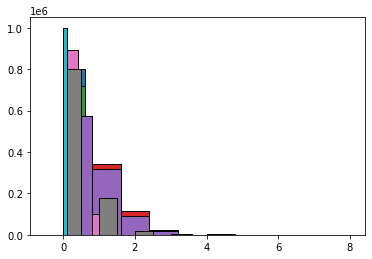

In [15]:
simulator = SIMULATOR_MECI();
simulator.init();
simulator.show();
#simulator.show_medii();
simulator.simulare();
#simulator.show_medii();
print('\n');
simulator.show_tabela();
print('\n');
simulator.show_tabela_2();